In [111]:
import os
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler



The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


# 1. Data Preprocessing:

## Loading and Log Transformation

In [125]:
response = pd.read_csv('drug_response_classifications.csv')
response

,Sample ID,Dataset,Response
0,PIK3CA-1113,MGH_Alpelisib,Responder
1,MGHCC1099,MGH_Ribociclib,Responder
2,MGHCC1573,MGH_Ribociclib,Non-responder
3,PIK3CA-0036,MGH_Alpelisib,Responder
4,PIK3CA-1039,MGH_Alpelisib,Responder
...,...,...,...
1002,Pt92_On,Anti-PD1,Non-responder
1003,Pt93_On,Anti-PD1,Non-responder
1004,Pt94_On,Anti-PD1,Responder
1005,Pt98_On,Anti-PD1,Non-responder


In [126]:
df_1 = pd.read_csv('/Users/hongleizhao/Documents/enlight-data-main/Data/Trastuzumab.csv')
df_2 = pd.read_csv('/Users/hongleizhao/Documents/enlight-data-main/Data/Trastuzumab_2.csv')
df_3 = pd.read_csv('/Users/hongleizhao/Documents/enlight-data-main/Data/Trastuzumab_3.csv')
df_4 = pd.read_csv('/Users/hongleizhao/Documents/enlight-data-main/Data/Trastuzumab_4.csv')
df_5= pd.read_csv('/Users/hongleizhao/Documents/enlight-data-main/Data/Trastuzumab_5.csv')
df_6= pd.read_csv('/Users/hongleizhao/Documents/enlight-data-main/Data/MK2206.csv')
df_7= pd.read_csv('/Users/hongleizhao/Documents/enlight-data-main/Data/Anti-PD1_4.csv')
df_8= pd.read_csv('/Users/hongleizhao/Documents/enlight-data-main/Data/Lapatinib.csv')
df_9= pd.read_csv('/Users/hongleizhao/Documents/enlight-data-main/Data/MGH_Ribociclib.csv')
df_10= pd.read_csv('/Users/hongleizhao/Documents/enlight-data-main/Data/MGH_Alpelisib.csv')


In [127]:
df_1

,index,GSM1232994,GSM1232996,GSM1232997,GSM1232998,GSM1232999,GSM1233000,GSM1233001,GSM1233004,GSM1233006,...,GSM1233094,GSM1233097,GSM1233099,GSM1233100,GSM1233104,GSM1233106,GSM1233111,GSM1233112,GSM1233122,GSM1233146
0,A1BG,2.906162,2.585542,2.589861,2.913350,2.470877,2.740857,2.555669,3.256945,2.547244,...,2.632552,2.924806,3.023455,3.303868,2.652106,2.349184,2.747831,2.732763,2.440411,2.605471
1,A1BG-AS1,6.034577,6.341333,6.210598,6.098998,5.875681,5.762485,5.902024,6.211903,5.976402,...,6.299337,5.910188,5.752793,5.691979,5.781370,6.033524,6.072065,8.417168,5.772759,6.107404
2,A1CF,3.767476,3.614123,4.044349,3.956625,3.581188,3.225436,3.647617,3.478093,3.229459,...,3.604005,3.774571,3.917862,4.244282,3.452955,4.209184,4.338115,4.409107,3.371618,3.191149
3,A2M,12.004274,12.658412,12.118935,12.980047,11.579897,11.818435,11.570938,11.268191,12.023999,...,12.235427,11.481975,11.726297,11.532574,11.761617,10.234834,10.851626,12.684768,12.371135,12.254429
4,A2M-AS1,4.284767,4.876153,3.802686,5.351633,4.017873,4.074753,3.874134,3.770874,4.603832,...,3.672055,4.562868,3.683861,3.765982,4.808963,3.832239,3.735662,3.623666,5.227370,4.489118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23515,abParts /// IGKC /// IGKV4-1 /// IGKV4-1,6.455103,3.837455,4.520198,6.444622,4.050683,6.367347,4.144479,3.837821,6.025658,...,6.982423,6.346981,5.536189,7.238257,6.538896,4.738378,4.484734,6.483929,5.120986,5.209982
23516,av27s1 /// TRAV39 /// TRAV39,2.463091,2.352828,2.554629,2.637649,2.566570,2.378069,2.550581,3.048281,3.011671,...,2.395518,2.464476,2.732345,2.485905,2.236202,3.083585,2.487803,2.534013,2.119982,2.599480
23517,hsa-let-7a-3 /// hsa-let-7b /// hsa-mir-4763 /...,4.851401,4.650068,5.377232,4.656977,5.199297,4.827627,4.496952,5.281651,5.119090,...,4.978136,5.823776,5.112949,4.623706,5.183049,5.029412,4.571560,5.129521,5.087105,5.218233
23518,hsa-let-7a-3 /// hsa-let-7b /// hsa-mir-4763 /...,3.353079,2.331107,2.549676,2.599367,3.606659,4.387505,3.363578,3.720749,3.400347,...,3.280721,4.217978,3.781797,5.036968,6.044524,3.841819,3.113519,5.387885,3.844822,4.840324


In [128]:
df_10 = df_10.rename(columns={'Unnamed: 0': 'index'})

In [129]:
df_5_log = np.log2(df_5.drop(columns= ['index']) +1)
df_10_log  = np.log2(df_10.drop(columns= ['index']) +1)
df_9_log = np.log2(df_9.drop(columns= ['index']) +1)

In [131]:
df_10_log = df_10.copy()
df_10_log['index'] = df_10['index']
df_10_log = np.log2(df_10_log.drop(columns=['index']) + 1)
df_10_log.insert(0, 'index', df_10['index'])

df_9_log = df_9.copy()
df_9_log['index'] = df_9['index']
df_9_log = np.log2(df_9_log.drop(columns=['index']) + 1)
df_9_log.insert(0, 'index', df_9['index'])

df_5_log = df_5.copy()
df_5_log['index'] = df_5['index']
df_5_log = np.log2(df_5_log.drop(columns=['index']) + 1)
df_5_log.insert(0, 'index', df_5['index'])

In [132]:
df_5 = df_5_log
df_9 = df_9_log
df_10 = df_10_log

In [133]:
df_10

,index,PIK3CA-0001,PIK3CA-0002,PIK3CA-0003,PIK3CA-0004,PIK3CA-0036,PIK3CA-0047,PIK3CA-1020,PIK3CA-1033,PIK3CA-1038,PIK3CA-1045,PIK3CA-1052,PIK3CA-1268,PIK3CA-1458,PIK3CA-1588,PIK3CA-2179,PIK3CA-1039,PIK3CA-1676,PIK3CA-1035,PIK3CA-1113
0,5S_rRNA,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.115901,2.365565,3.898699
1,7SK,15.361163,14.125839,15.961286,14.949691,13.925456,14.761509,15.385263,14.585026,14.766433,14.174627,10.284361,15.176179,14.960504,14.671884,14.210265,7.147201,8.688642,9.111482,8.373477
2,A1BG,3.075533,9.042371,0.310340,1.748461,0.201634,0.000000,0.000000,1.292782,0.000000,1.035624,3.967169,2.400538,0.000000,1.550901,0.823749,0.000000,0.276147,1.020242,1.037446
3,A1BG-AS1,3.934517,0.000000,0.659925,2.853996,0.970854,3.920293,3.974529,2.298658,4.175525,1.490570,1.952334,2.080658,1.339137,1.014355,0.000000,0.000000,0.585027,1.890757,2.210794
4,A1CF,0.000000,4.956986,0.000000,0.704872,0.097611,0.000000,3.145677,0.000000,0.000000,0.000000,0.000000,0.000000,0.622930,0.000000,0.000000,1.495327,0.150314,4.667178,3.594293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38756,ZZEF1,4.143230,7.103288,2.831877,3.972693,2.883621,3.778209,3.779260,4.015248,4.569856,3.415488,1.130931,3.508429,4.236493,3.911692,3.446256,1.834205,2.975053,3.558738,3.284351
38757,ZZZ3,5.280214,4.922198,3.451541,3.795975,2.648465,3.679199,2.375735,2.799087,2.729009,3.542258,0.000000,3.339137,4.164304,3.241840,2.859970,0.000000,2.806056,3.510670,2.882071
38758,hsa-mir-1253,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
38759,hsa-mir-423,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [134]:
df_list = [df_1, df_2, df_3, df_4, df_5, df_6, df_7, df_8, df_9, df_10]
scaler = MinMaxScaler()
transformed_dfs = []

for i, df_i in enumerate(df_list, start=1):
    
    df_i_scaled = df_i.copy()
    
    numeric_columns = df_i_scaled.select_dtypes(include=['float64', 'int64']).columns
    df_i_scaled[numeric_columns] = scaler.fit_transform(df_i_scaled[numeric_columns])
    
    df_i_transposed = df_i_scaled.set_index('index').T
    df_i_transposed = df_i_transposed.reset_index()
    df_i_transposed = df_i_transposed.rename(columns={'index': 'Sample ID'})
    
    # Append the scaled and transposed DataFrame to the list
    transformed_dfs.append(df_i_transposed)

# Concatenate all scaled and transposed DataFrames
df_merged = pd.concat(transformed_dfs, axis=0, ignore_index=True, join='outer')

In [135]:
df_merged = df_merged.merge(response[['Sample ID', 'Response']], on='Sample ID', how='left')
df_merged

,Sample ID,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2MP1,A4GALT,A4GNT,...,ZSWIM5P2,ZSWIM5P3,ZSWIM8-AS1,ZYG11AP1,ZYXP1,hsa-mir-1253,hsa-mir-423,snoZ196,OR7E11P,Response
0,GSM1232994,0.014810,0.036881,0.020886,0.078997,0.024536,0.012492,0.022613,0.028951,0.007119,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Non-responder
1,GSM1232996,0.012869,0.038611,0.019919,0.081908,0.028569,0.014354,0.018544,0.028272,0.006147,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Non-responder
2,GSM1232997,0.011999,0.036611,0.021886,0.076774,0.020243,0.013167,0.016395,0.028057,0.006055,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Non-responder
3,GSM1232998,0.014929,0.036744,0.022073,0.083866,0.031626,0.013992,0.017639,0.028910,0.006811,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Non-responder
4,GSM1232999,0.012019,0.035429,0.019653,0.074649,0.022655,0.015183,0.016023,0.028836,0.006652,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Non-responder
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,PIK3CA-2179,0.055031,0.000000,0.000000,0.271638,0.043475,0.000000,0.000000,0.087149,0.000000,...,0.000000,0.000000,0.060328,0.000000,0.0,0.0,0.0,0.0,0.000000,Responder
409,PIK3CA-1039,0.000000,0.000000,0.090652,0.091399,0.169265,0.000000,0.000000,0.198462,0.000000,...,0.000000,0.196829,0.000000,0.000000,0.0,0.0,0.0,0.0,0.117978,Responder
410,PIK3CA-1676,0.017215,0.036470,0.009370,0.296539,0.068619,0.032925,0.014973,0.084897,0.010076,...,0.024317,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.024285,Responder
411,PIK3CA-1035,0.067094,0.124342,0.306928,0.455096,0.122440,0.016627,0.049602,0.041227,0.039328,...,0.035146,0.000000,0.000000,0.041326,0.0,0.0,0.0,0.0,0.019166,Non-responder


In [79]:
duplicate_counts = df_merged['Sample ID'].value_counts()
print(duplicate_counts[duplicate_counts > 1])

Series([], Name: count, dtype: int64)


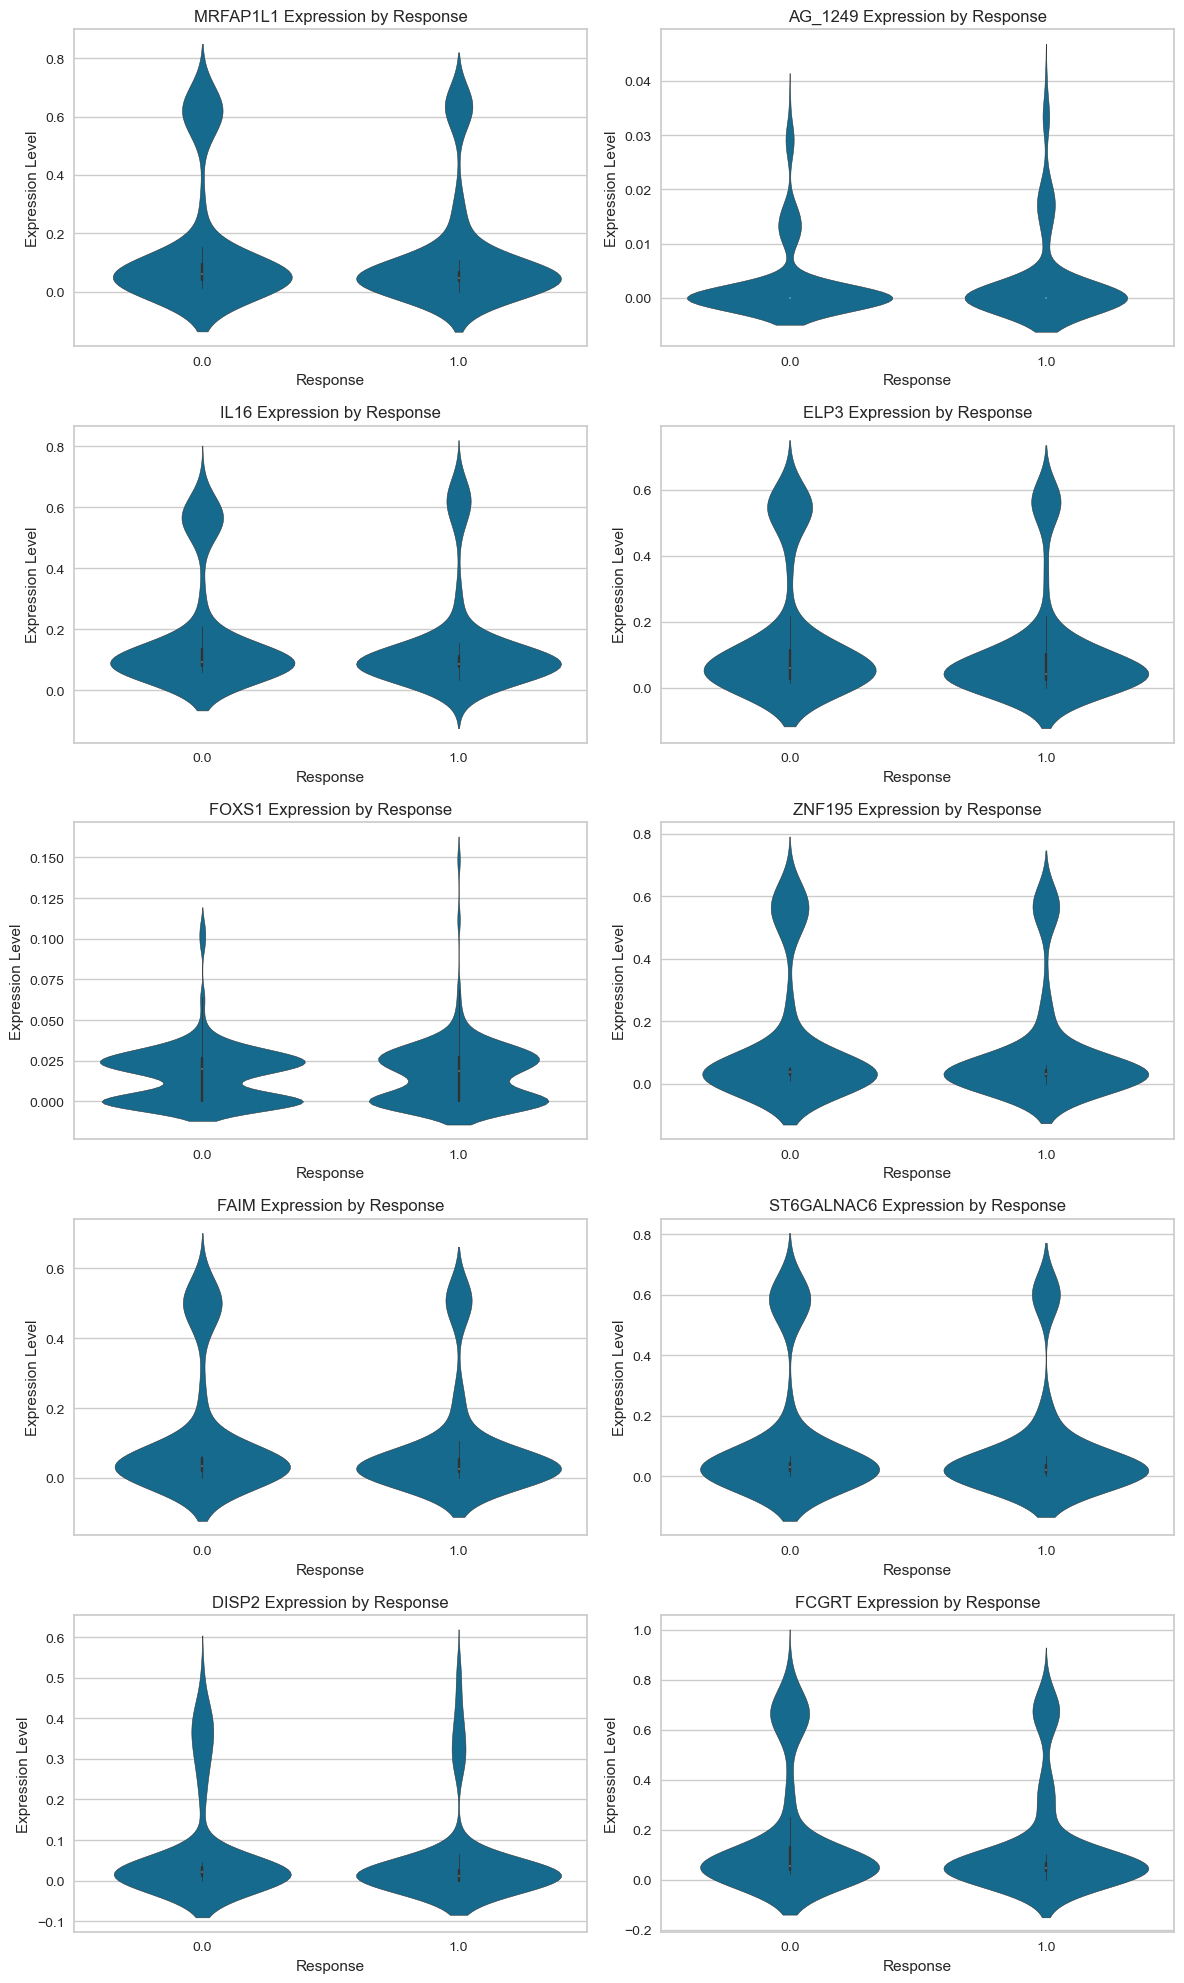

In [97]:
top_gene = ['MRFAP1L1', 'AG_1249', 'IL16', 'ELP3', 'FOXS1', 'ZNF195', 'FAIM', 'ST6GALNAC6', 'DISP2', 'FCGRT']
fig, axes = plt.subplots(5, 2, figsize=(12, 20))  # 5 rows, 2 columns
axes = axes.flatten()  # Flatten the axes array to easily iterate over

# Loop through the top10_gene list and plot each gene's expression in a subplot
for i, gene in enumerate(top_gene):
    sns.violinplot(x=df_merged['Response'], y=df_merged[gene], ax=axes[i])
    axes[i].set_title(f'{gene} Expression by Response')
    axes[i].set_xlabel('Response')
    axes[i].set_ylabel('Expression Level')

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

In [136]:
df_merged['Response'] = df_merged['Response'].map({'Non-responder':0,'Responder':1})

In [137]:
df_merged['Response'].value_counts()

Response
0.0    243
1.0    167
Name: count, dtype: int64

In [138]:
df_merged.loc[df_merged.Response.isna()==True]

,Sample ID,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2MP1,A4GALT,A4GNT,...,ZSWIM5P2,ZSWIM5P3,ZSWIM8-AS1,ZYG11AP1,ZYXP1,hsa-mir-1253,hsa-mir-423,snoZ196,OR7E11P,Response
387,MGHCC1101,0.318505,0.340738,0.019781,0.333914,0.109567,0.000000,0.0,0.233912,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
391,MGHCC1108,0.054248,0.113215,0.000000,0.434901,0.149005,0.011071,0.0,0.149201,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
393,MGHCC0002,0.000000,0.183774,0.000000,0.409780,0.170883,0.000000,0.0,0.146787,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN


In [139]:
response.loc[response['Sample ID'].isin(['MGHCC0002','MGHCC1108','MGHCC1101'])]

,Sample ID,Dataset,Response


In [140]:
df_merged = df_merged[~df_merged['Sample ID'].isin(['MGHCC0002', 'MGHCC1108', 'MGHCC1101'])]

In [141]:
df_merged = df_merged.loc[:, df_merged.isna().sum() <= 350]

In [145]:
ckap2_columns = df_merged.filter(like='CKAP2').columns.tolist()

# Get columns containing any of the IGL-related genes
ig_columns = df_merged.filter(like='IGLC').columns.tolist() + \
             df_merged.filter(like='IGLV').columns.tolist() + \
             df_merged.filter(like='IGLJ').columns.tolist()

# Find columns that contain both 'CKAP2' and any of the IGL-related genes
ckap2_ig_columns = [
    col for col in ckap2_columns if any(ig in col for ig in ig_columns)
]
ckap2_ig_columns

['CKAP2 /// DKFZp667J0810 /// IGLC1 /// IGLJ2 /// IGLJ2 /// IGLJ3 /// IGLJ3 /// IGLJ3 /// IGLV1-36 /// IGLV1-36 /// IGLV1-44 /// IGLV1-50 /// IGLV1-50 /// IGLV@',
 'CKAP2 /// IGLC1 /// IGLJ2 /// IGLJ2 /// IGLJ3 /// IGLJ3 /// IGLJ3 /// IGLV1-44 /// IGLV2-14 /// IGLV@',
 'CKAP2 /// IGLC1 /// IGLJ2 /// IGLJ2 /// IGLJ3 /// IGLJ3 /// IGLJ3 /// IGLV3-1 /// IGLV3-1 /// IGLV@',
 'CKAP2 /// IGLC1 /// IGLV1-40 /// IGLV1-40 /// IGLV1-50 /// IGLV1-50',
 'CKAP2 /// IGLC1 /// IGLV3-1 /// IGLV3-1 /// IGLV@',
 'CKAP2 /// IGLJ3 /// IGLV3-19 /// IGLV3-19']

In [146]:
df_merged['CKAP2_IG'] = df_merged[ckap2_ig_columns].mean(axis=1)
df_merged.drop(columns=ckap2_ig_columns, inplace=True)

In [147]:
ig_columns = df_merged.filter(like='IGLC').columns.tolist() + \
             df_merged.filter(like='IGLV').columns.tolist() + \
             df_merged.filter(like='IGLJ').columns.tolist()
df_merged['IGs'] = df_merged[ig_columns].mean(axis=1)
df_merged.drop(columns=ig_columns, inplace=True)

In [ ]:
columns_with_slashes = [col for col in df_merged.columns if '/' in col]
df_merged.columns = [col.split('/')[0] if col in columns_with_slashes else col for col in df_merged.columns]

# Step 2: Group by the column names (after renaming) and calculate the mean for each group
df_mean = df_merged.groupby(df_merged.columns, axis=1).mean()

# Step 3: Replace the original DataFrame with the mean DataFrame
df_merged = df_mean

In [157]:
df_merged.fillna(0, inplace=True)

In [158]:
df_merged.to_csv('breast_cancer_mRNA_data.csv', index=False)

# Exploratory Data Analysis (EDA)

## Feature Engineering

## Identify the top 10 feature genes

In [20]:
df_merged.columns

Index(['Sample ID', 'A1BG', 'A1BG-AS1', 'A1CF', 'A2M', 'A2M-AS1', 'A2ML1',
       'A2MP1', 'A4GALT', 'A4GNT',
       ...
       'ZNF735P', 'ZNF737', 'ZNF788', 'ZNF815P', 'ZNF816-ZNF321P', 'ZNF833P',
       'ZNF847P', 'ZNF878', 'ZSCAN5B', 'Response'],
      dtype='object', length=27549)

In [89]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.model_selection import train_test_split, GridSearchCV  
from sklearn.impute import SimpleImputer  
from sklearn.preprocessing import StandardScaler, OneHotEncoder  
from sklearn.compose import make_column_transformer  
from sklearn.pipeline import make_pipeline  

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import  RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Scaling

In [159]:

X = df_merged.drop(columns=['Sample ID','Response'], axis=1)
y = df_merged['Response']  



# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [160]:
# Get feature importance from the trained model
feature_importance = rf.feature_importances_

# Create a DataFrame with gene names (assuming columns in X are gene names)
feature_df = pd.DataFrame({
    'Gene': X.columns,  # Assuming X is a DataFrame with gene names as columns
    'Importance': feature_importance
})

# Sort by importance in descending order
top_genes = feature_df.sort_values(by='Importance', ascending=False).head(10)

# Display the top 10 important genes
print(top_genes)

          Gene  Importance
13738     PARN    0.002247
20080    TUBA8    0.001842
537     AHNAK2    0.001765
5283       ELN    0.001581
8791     KLHL7    0.001478
4476       DDO    0.001466
23581  AG_1116    0.001439
1800     BOLA1    0.001394
19737    TRAF1    0.001379
4421    DCBLD1    0.001369


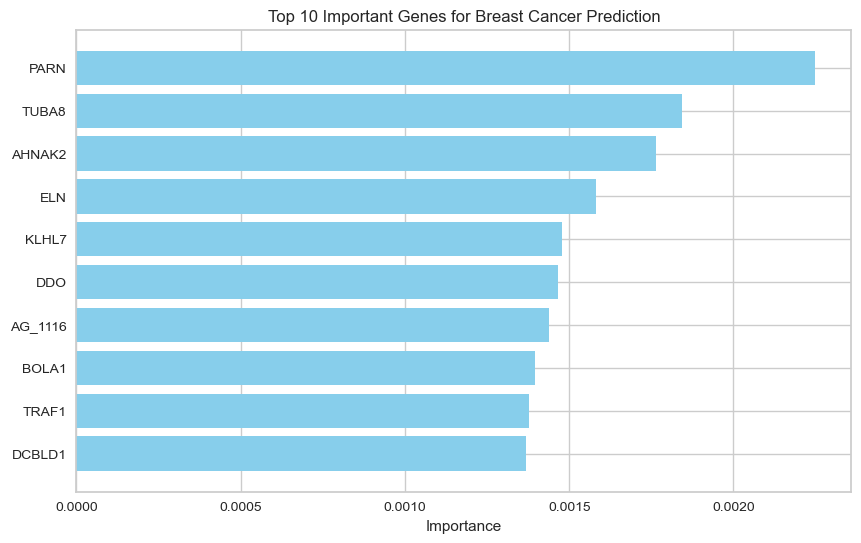

In [161]:
# Plot the top 10 important genes
plt.figure(figsize=(10, 6))
plt.barh(top_genes['Gene'], top_genes['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Top 10 Important Genes for Breast Cancer Prediction')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important gene at the top
plt.show()

In [163]:
genes=[]
for gene in top_genes.Gene:
    genes.append(gene)

print(genes)


['PARN', 'TUBA8', 'AHNAK2', 'ELN', 'KLHL7', 'DDO', 'AG_1116', 'BOLA1', 'TRAF1', 'DCBLD1']


In [162]:
numeric_columns = df_merged.select_dtypes(include=['float64', 'int64']).columns.difference(['response'])

# Calculate the average expression for each gene (excluding 'response')
avg_expression = df_merged[numeric_columns].mean(axis=1)

# Add the average expression to the DataFrame
df_merged['avg_expression'] = avg_expression

# Group by 'response' and calculate the mean expression for each gene for responders and non-responders
grouped_by_response = df_merged.groupby('Response')[numeric_columns].mean()

# Calculate the high expression threshold for each group (responders and non-responders)
high_expr_threshold_responders = grouped_by_response.loc[1].quantile(0.95)
high_expr_threshold_nonresponders = grouped_by_response.loc[0].quantile(0.95)

# Identify the high-expressed genes for responders and non-responders
high_expressed_genes_responders = grouped_by_response.loc[1][grouped_by_response.loc[1] > high_expr_threshold_responders]
high_expressed_genes_nonresponders = grouped_by_response.loc[0][grouped_by_response.loc[0] > high_expr_threshold_nonresponders]

# Print the results
print("High-expressed genes in responders:")
print(high_expressed_genes_responders)

print("\nHigh-expressed genes in non-responders:")
print(high_expressed_genes_nonresponders)

/var/folders/ys/kt70q71j7gz446l2lbpzjg9c0000gn/T/ipykernel_98951/1746200950.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_merged['avg_expression'] = avg_expression


High-expressed genes in responders:
AAK1      0.249511
ABCC3     0.193417
ABCF2     0.212590
ABHD2     0.243286
ABI2      0.257272
            ...   
ZMYND8    0.233067
ZNF148    0.207345
ZNF207    0.295515
ZNF24     0.227292
ZNF451    0.187812
Name: 1.0, Length: 1369, dtype: float64

High-expressed genes in non-responders:
AAK1      0.266554
ABCC3     0.229669
ABCF2     0.246361
ABHD2     0.292433
ABI2      0.303403
            ...   
ZNF148    0.269324
ZNF207    0.354017
ZNF24     0.276284
ZNF451    0.232289
ZXDC      0.230395
Name: 0.0, Length: 1369, dtype: float64


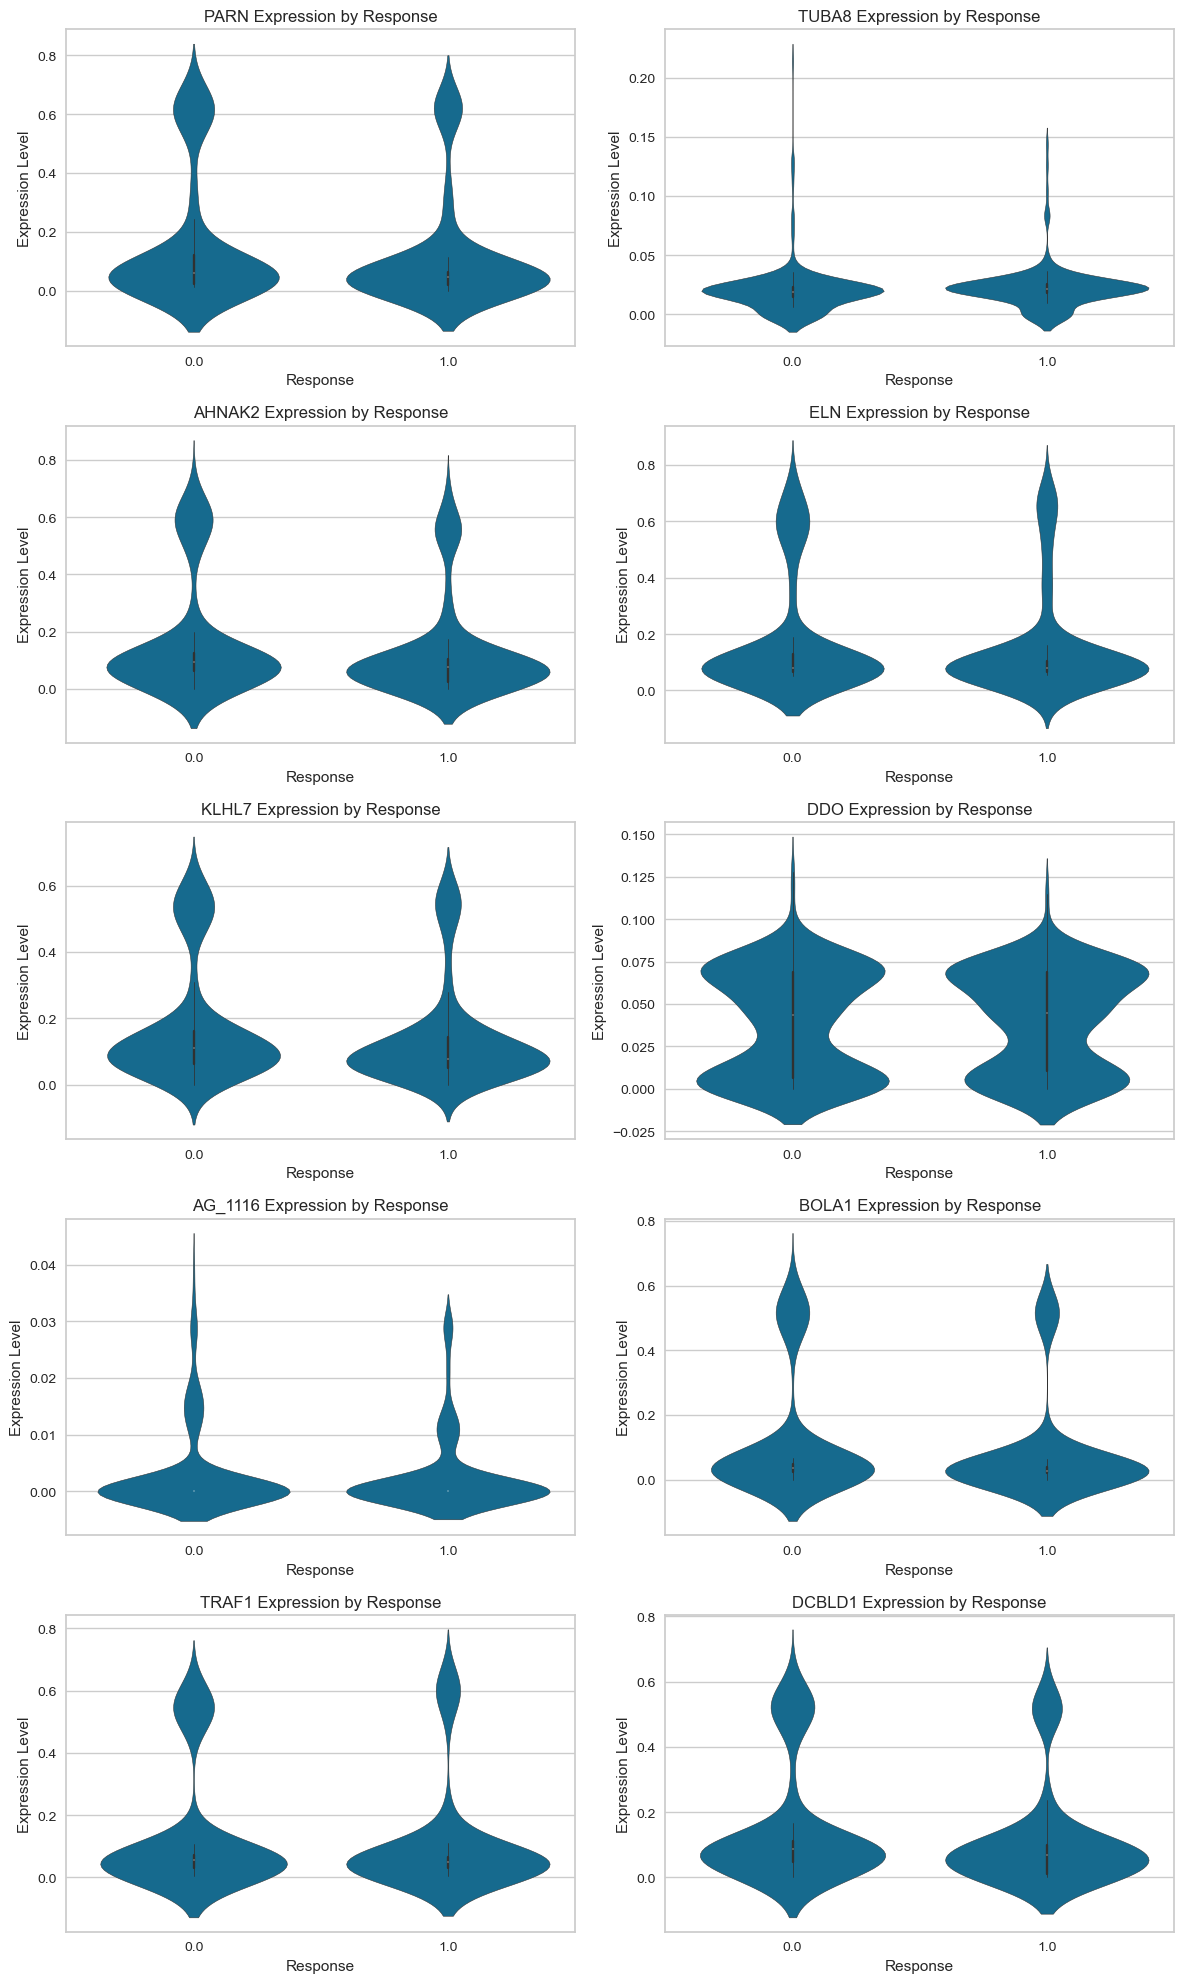

In [164]:
top10_gene = genes
fig, axes = plt.subplots(5, 2, figsize=(12, 20))  # 5 rows, 2 columns
axes = axes.flatten()  # Flatten the axes array to easily iterate over

# Loop through the top10_gene list and plot each gene's expression in a subplot
for i, gene in enumerate(top10_gene):
    sns.violinplot(x=df_merged['Response'], y=df_merged[gene], ax=axes[i])
    axes[i].set_title(f'{gene} Expression by Response')
    axes[i].set_xlabel('Response')
    axes[i].set_ylabel('Expression Level')

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

In [31]:
genes_of_interest = [
    "ERBB2", "BRCA1", "BRCA2", "TP53", "ER", "PR", "Ki-67", "EGFR", 
    "CTLA4", "CD44", "MMPs", "PIK3CA", "FOXM1", "AKT1", "PTEN"
]

genes_in_data = [gene for gene in genes_of_interest if gene in df_merged.index]
genes_in_data

[]

## Dimensionality Reduction (PCA)

In [32]:
X = df_merged.drop(columns=['Sample ID','Response'], axis=1)
scaler = StandardScaler()
decomp = PCA(n_components = 0.9)
pipe = make_pipeline(scaler, decomp)

pipe.fit(X)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=0.9))])

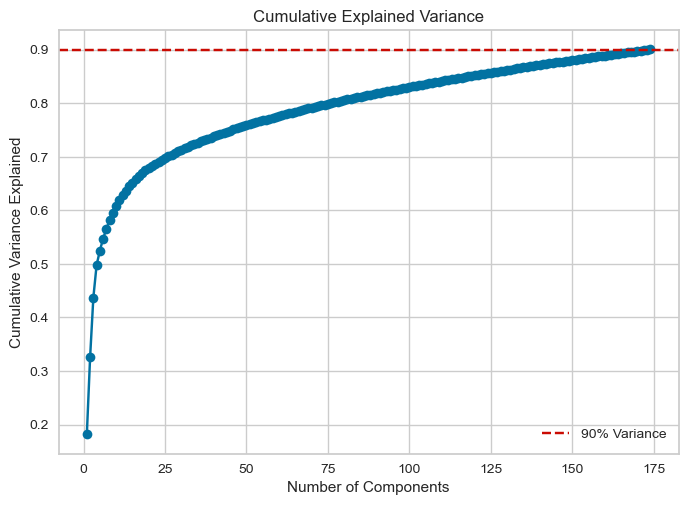

In [33]:

pca = pipe.named_steps['pca']

cumulative_variance = pca.explained_variance_ratio_.cumsum()

# Plot the cumulative explained variance
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.axhline(y=0.9, color='r', linestyle='--', label='90% Variance')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Explained')
plt.legend()
plt.show()

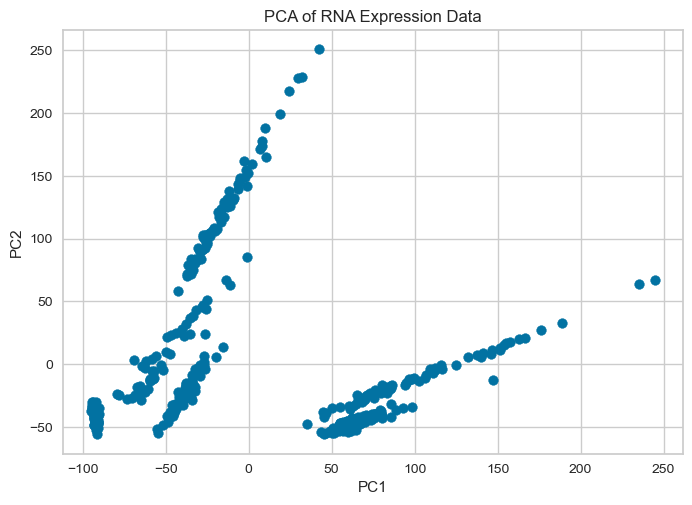

In [34]:
pca_result = pipe.transform(X)

# Now, plot the first two principal components
plt.scatter(pca_result[:, 0], pca_result[:, 1])
plt.title('PCA of RNA Expression Data')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [35]:
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")
print(f"Cumulative explained variance: {pca.explained_variance_ratio_.cumsum()}")

Explained variance ratio: [0.18142601 0.14380344 0.111877   0.06080843 0.02678339 0.02269195
 0.01804517 0.01660953 0.01301684 0.01296756 0.01130503 0.00915776
 0.00839946 0.00771348 0.00734083 0.00653607 0.00606126 0.00530171
 0.0048592  0.00428368 0.0041359  0.00397985 0.00379789 0.00352022
 0.0033507  0.00330633 0.00325785 0.00309279 0.00300678 0.00297109
 0.00278077 0.00270433 0.00256493 0.00253342 0.0024792  0.00241278
 0.00239226 0.00233899 0.00229484 0.00225192 0.00223359 0.00221192
 0.00216615 0.0021358  0.00209616 0.0020617  0.00200237 0.00196183
 0.00192039 0.00187935 0.00187077 0.00184398 0.00181529 0.00177975
 0.00176464 0.0017185  0.00169945 0.00168839 0.00168669 0.00164898
 0.00163746 0.00160676 0.00158038 0.00157327 0.00155953 0.00154929
 0.00151582 0.00150665 0.00147852 0.00145736 0.00144733 0.00143392
 0.001422   0.00141638 0.00141094 0.00138773 0.00138071 0.00136496
 0.00136057 0.00133623 0.00133265 0.00131574 0.00129364 0.00128702
 0.00127807 0.00126752 0.00124865 0.

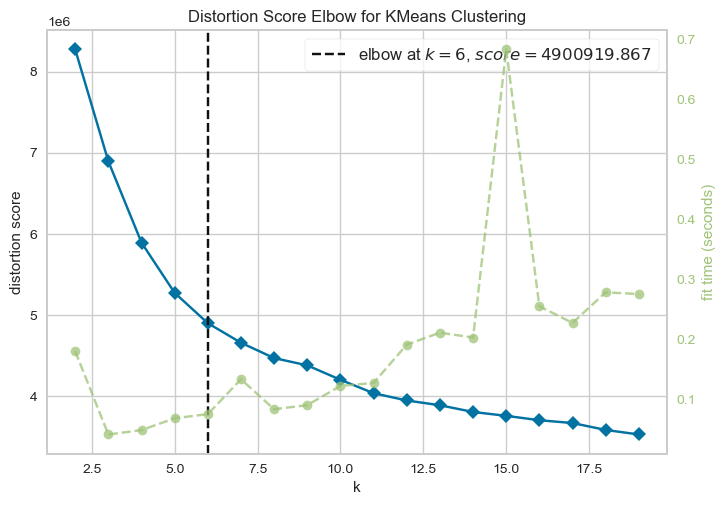

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [36]:
scaler = StandardScaler()
decomp = PCA(n_components=0.9)
cluster = KElbowVisualizer(KMeans(n_init=20),k=(2, 20))  # how many times the model runs, 10 is the default value
pipe = make_pipeline(scaler, decomp, cluster)

pipe.fit(X)
pipe[2].show()

In [37]:
scaler = StandardScaler()
decomp = PCA(n_components=.9)
cluster = KMeans(n_init=10, n_clusters=7)
pipe= make_pipeline(scaler, decomp, cluster)

pipe.fit(X)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=0.9)),
                ('kmeans', KMeans(n_clusters=7, n_init=10))])

In [244]:
values = pipe[:2].transform(X)
pca_labels = [f'PC{idx+1}' for idx, i in enumerate(values.T)]
df_merged_pca = df_merged.join(pd.DataFrame(values, columns=pca_labels))

df_merged_pca['clusters'] = pipe['kmeans'].labels_

In [245]:
df_merged_pca.columns

Index(['Sample ID', 'A1BG', 'A1BG-AS1', 'A1CF', 'A2M', 'A2M-AS1', 'A2ML1',
       'A2MP1', 'A4GALT', 'A4GNT',
       ...
       'ZSCAN5B', 'Response', 'CKAP2_IG', 'IGs', 'PC1', 'PC2', 'PC3', 'PC4',
       'PC5', 'clusters'],
      dtype='object', length=27535)

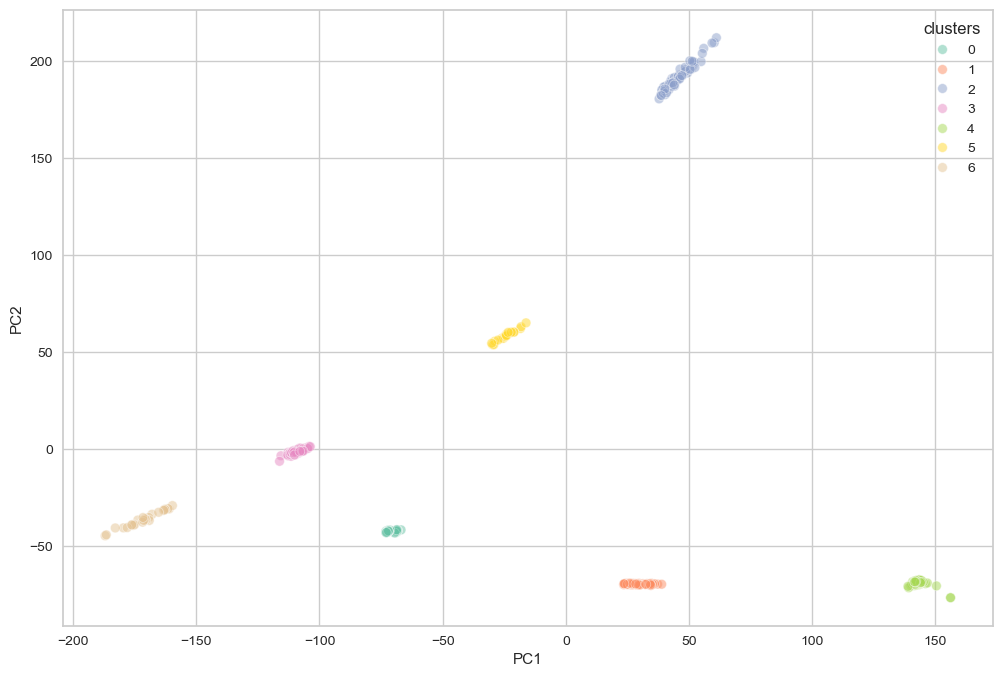

In [246]:
plt.figure(figsize=(12,8))
g = sns.scatterplot(data=df_merged_pca, x="PC1", y="PC2", hue="clusters", alpha=0.5, palette="Set2")


<Axes: xlabel='clusters', ylabel='count'>

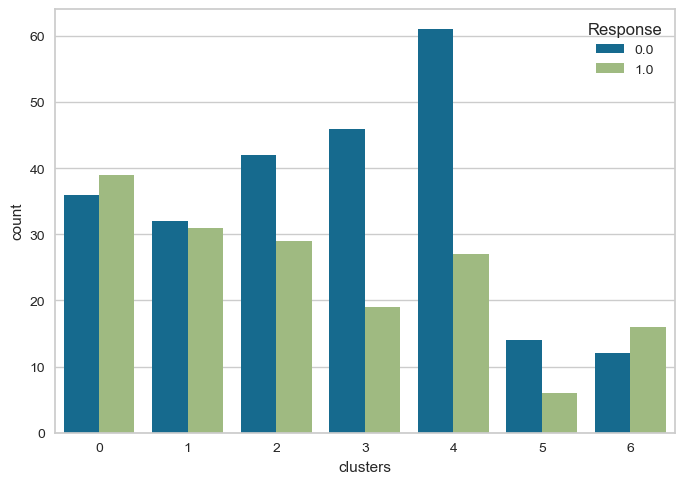

In [247]:
sns.countplot(x = "clusters", hue='Response', data=df_merged_pca)


# 3. Machine learning model to predict drug response

In [173]:
from sklearn.model_selection import train_test_split, GridSearchCV  
from sklearn.impute import SimpleImputer  
from sklearn.preprocessing import StandardScaler, OneHotEncoder  
from sklearn.compose import make_column_transformer  
from sklearn.pipeline import make_pipeline  

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import  RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## ML with PCA 

In [248]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=0.9)
X_pca = pca.fit_transform(X_scaled)
y = df_merged['Response']  

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [249]:
classifier_scale = [SVC(),
                     KNeighborsClassifier(),
                     GradientBoostingClassifier(n_estimators=100, random_state=42)]

classifier_not_scale = [LogisticRegression(),
                         DecisionTreeClassifier(),
                         RandomForestClassifier()]
    
scaler = StandardScaler()

In [251]:
for classifier in classifier_scale:
    pipe = make_pipeline(StandardScaler(), classifier)
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_train)
    
    # Evaluate the model
    accuracy = accuracy_score(y_train, y_pred)
    print(f'{classifier} Accuracy: {accuracy * 100:.2f}%')
    print("Classification Report:")
    print(classification_report(y_train, y_pred))

# Evaluate regressors that do not require scaling
for classifier in classifier_not_scale:
    pipe = make_pipeline(classifier)
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_train)
     # Evaluate the model
    accuracy = accuracy_score(y_train, y_pred)
    print(f'{classifier} Accuracy: {accuracy * 100:.2f}%')
    print("Classification Report:")
    print(classification_report(y_train, y_pred))

SVC() Accuracy: 60.67%
Classification Report:
              precision    recall  f1-score   support

         0.0       0.61      1.00      0.76       199
         1.0       0.00      0.00      0.00       129

    accuracy                           0.61       328
   macro avg       0.30      0.50      0.38       328
weighted avg       0.37      0.61      0.46       328

KNeighborsClassifier() Accuracy: 74.39%
Classification Report:
              precision    recall  f1-score   support

         0.0       0.77      0.82      0.80       199
         1.0       0.70      0.62      0.66       129

    accuracy                           0.74       328
   macro avg       0.73      0.72      0.73       328
weighted avg       0.74      0.74      0.74       328



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


GradientBoostingClassifier(random_state=42) Accuracy: 92.38%
Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94       199
         1.0       1.00      0.81      0.89       129

    accuracy                           0.92       328
   macro avg       0.94      0.90      0.92       328
weighted avg       0.93      0.92      0.92       328

LogisticRegression() Accuracy: 61.59%
Classification Report:
              precision    recall  f1-score   support

         0.0       0.62      0.97      0.75       199
         1.0       0.60      0.07      0.12       129

    accuracy                           0.62       328
   macro avg       0.61      0.52      0.44       328
weighted avg       0.61      0.62      0.51       328

DecisionTreeClassifier() Accuracy: 100.00%
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       199
         1.0       1.00   

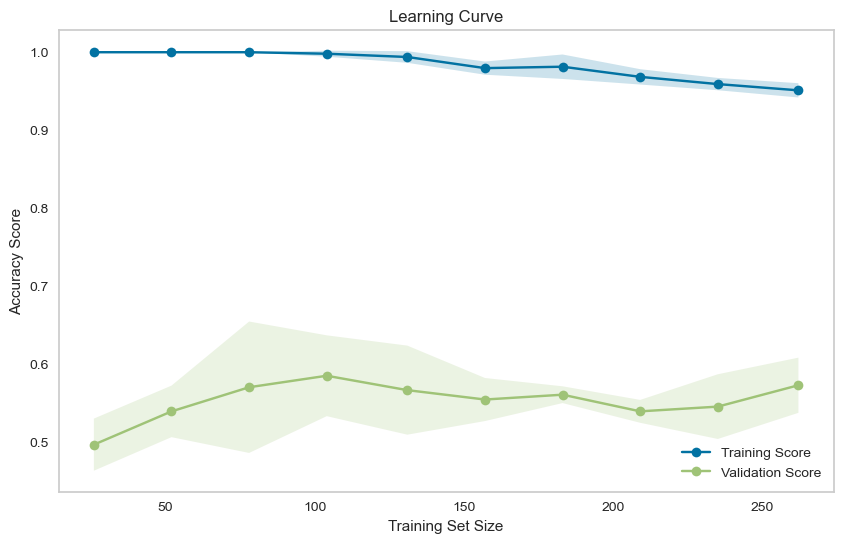

In [252]:
pipe = make_pipeline(StandardScaler(), GradientBoostingClassifier(n_estimators=100, random_state=42))
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_train)

from sklearn.model_selection import learning_curve

# Generate learning curve data
train_sizes, train_scores, val_scores = learning_curve(
    pipe, X_train, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculate mean and standard deviation
train_scores_mean = train_scores.mean(axis=1)
train_scores_std = train_scores.std(axis=1)
val_scores_mean = val_scores.mean(axis=1)
val_scores_std = val_scores.std(axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label="Training Score", marker='o')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2)
plt.plot(train_sizes, val_scores_mean, label="Validation Score", marker='o')
plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.2)

plt.xlabel("Training Set Size")
plt.ylabel("Accuracy Score")
plt.title("Learning Curve")
plt.legend()
plt.grid()
plt.show()

## ML with original X

In [253]:
X = df_merged.drop(columns=['Sample ID','Response'], axis=1)
y = df_merged['Response']  


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [254]:
classifier_scale = [SVC(),
                     KNeighborsClassifier(),
                     GradientBoostingClassifier(n_estimators=100, random_state=42)]

classifier_not_scale = [LogisticRegression(),
                         DecisionTreeClassifier(),
                         RandomForestClassifier()]
    
scaler = StandardScaler()

In [263]:
for classifier in classifier_scale:
    pipe = make_pipeline(StandardScaler(), classifier)
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_train)
    
    # Evaluate the model
    accuracy = accuracy_score(y_train, y_pred)
    print(f'{classifier} Accuracy: {accuracy * 100:.2f}%')
    print("Classification Report:")
    print(classification_report(y_train, y_pred))

# Evaluate regressors that do not require scaling
for classifier in classifier_not_scale:
    pipe = make_pipeline(classifier)
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_train)
     # Evaluate the model
    accuracy = accuracy_score(y_train, y_pred)
    print(f'{classifier} Accuracy: {accuracy * 100:.2f}%')
    print("Classification Report:")
    print(classification_report(y_train, y_pred))
 
  

SVC() Accuracy: 60.98%
Classification Report:
              precision    recall  f1-score   support

         0.0       0.61      1.00      0.76       199
         1.0       1.00      0.01      0.02       129

    accuracy                           0.61       328
   macro avg       0.80      0.50      0.39       328
weighted avg       0.76      0.61      0.47       328

KNeighborsClassifier() Accuracy: 75.91%
Classification Report:
              precision    recall  f1-score   support

         0.0       0.79      0.82      0.81       199
         1.0       0.71      0.66      0.68       129

    accuracy                           0.76       328
   macro avg       0.75      0.74      0.74       328
weighted avg       0.76      0.76      0.76       328

GradientBoostingClassifier(random_state=42) Accuracy: 100.00%
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       199
         1.0       1.00      1.00      1.00

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression() Accuracy: 100.00%
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       199
         1.0       1.00      1.00      1.00       129

    accuracy                           1.00       328
   macro avg       1.00      1.00      1.00       328
weighted avg       1.00      1.00      1.00       328

DecisionTreeClassifier() Accuracy: 100.00%
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       199
         1.0       1.00      1.00      1.00       129

    accuracy                           1.00       328
   macro avg       1.00      1.00      1.00       328
weighted avg       1.00      1.00      1.00       328

RandomForestClassifier() Accuracy: 100.00%
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       199
         1.0       1.00      1.00      1.00

##  3.2 Trianing and Evaluation of Model Performance

### SVC

In [262]:
svc = SVC()

param_grid = {
    'C': [0.1, 1, 10, 100],  # Uniform distribution between 0.1 and 100
    'kernel': ['linear', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-validation Accuracy: {grid_search.best_score_}")

Best Parameters: {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}
Best Cross-validation Accuracy: 0.6802331002331002


In [266]:
param_grid = {
    'n_neighbors': [3, 5, 7, 10],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree'],
    'p': [1, 2],
    'metric': ['minkowski', 'euclidean', 'manhattan', 'cosine']
}

# Instantiate the model
knn = KNeighborsClassifier()

# Perform grid search with cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5, error_score='raise')
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

ValueError: Metric 'cosine' not valid. Use sorted(sklearn.neighbors.VALID_METRICS['ball_tree']) to get valid options. Metric can also be a callable function.

In [ ]:
pipe = make_pipeline(StandardScaler(), GradientBoostingClassifier(n_estimators=100, random_state=42))
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_train)

from sklearn.model_selection import learning_curve

# Generate learning curve data
train_sizes, train_scores, val_scores = learning_curve(
    pipe, X_train, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculate mean and standard deviation
train_scores_mean = train_scores.mean(axis=1)
train_scores_std = train_scores.std(axis=1)
val_scores_mean = val_scores.mean(axis=1)
val_scores_std = val_scores.std(axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label="Training Score", marker='o')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2)
plt.plot(train_sizes, val_scores_mean, label="Validation Score", marker='o')
plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.2)

plt.xlabel("Training Set Size")
plt.ylabel("Accuracy Score")
plt.title("Learning Curve")
plt.legend()
plt.grid()
plt.show()